(1713, 3448, 3)


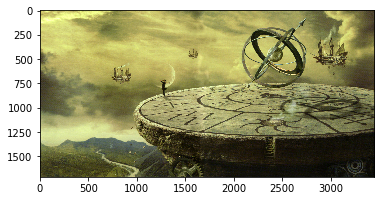

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.image as mpimg
import numpy as np
pic = mpimg.imread(r'C:\Users\Keerthi Admin\Documents\MIS\Homework 2\clockwork-angels.jpg')
plt.imshow(pic)
arr = np.array(pic)
print(arr.shape)

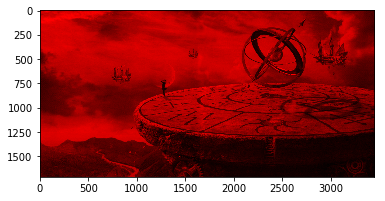

In [2]:
arr[:,:,1] = np.zeros((1713,3448))
arr[:,:,2] = np.zeros((1713,3448))
arrRed = arr
arrRed = arr[:,:,0]
plt.imshow(arr)
# plt.imshow(arr)


In [7]:
patches_list = list()
loop = 1000
while loop>0:
    x1 = np.random.randint(1,1697)
    y1 = np.random.randint(1,3432)
    patch = np.zeros((16,16))
    for i in range(0,16):
        for j in range(0,16):
            patch[i,j] = arrRed[x1+i,y1+j]
    
    patches_list.append(patch)
    loop = loop-1
print(len(patches_list))
patch.shape

1000


(16, 16)

In [8]:
vpatches_list = list()
(rows,columns) = patch.shape
# print(rows,columns)
for i in range(len(patches_list)):
    temp = np.asarray(patches_list[i])
    vertical_patch = np.zeros((256,1))
    for r in range(0,rows):
        for c in range(0,columns):
            vertical_patch[c+(r*columns),0] = temp[r,c]
    vpatches_list.append(vertical_patch) 
    
print(len(vpatches_list)) 
vertical_patch.shape

1000


(256, 1)

In [9]:
C = np.zeros((256,256))

for i in range(0,len(vpatches_list)):
    temp = np.asarray(vpatches_list[i])
    tempTranspose = np.transpose(temp)
    C = np.add(C,np.dot(temp,tempTranspose))

print(C)   
print(C.shape)

[[21292178. 21271851. 21239224. ... 20538609. 20566498. 20582534.]
 [21271851. 21271379. 21248899. ... 20527116. 20554849. 20571397.]
 [21239224. 21248899. 21246872. ... 20523884. 20551773. 20568706.]
 ...
 [20538609. 20527116. 20523884. ... 20917253. 20936823. 20916635.]
 [20566498. 20554849. 20551773. ... 20936823. 20978829. 20969606.]
 [20582534. 20571397. 20568706. ... 20916635. 20969606. 20982332.]]
(256, 256)


In [18]:
eigenvalues, eigenvectors = np.linalg.eig(C)
index = np.argsort(eigenvalues)[::-1]
eigenvector = np.array(eigenvectors[:,index])
eigenvalue = np.sort(eigenvalues)[::-1]
print(eigenvalue[0:64])
eigenvector = np.matrix(eigenvector)
eigenvector[:,1].shape

[5.29539076e+09 2.30821480e+07 1.30262991e+07 9.71112671e+06
 3.94246099e+06 3.59932706e+06 2.73056736e+06 2.38266386e+06
 1.96122873e+06 1.23677777e+06 1.09169513e+06 9.52364797e+05
 9.43889135e+05 7.47743870e+05 6.12166868e+05 5.37266042e+05
 4.76434976e+05 4.02226005e+05 3.40147731e+05 3.05478944e+05
 2.68505410e+05 2.47712576e+05 2.27919891e+05 1.97128473e+05
 1.83113634e+05 1.80931066e+05 1.58901393e+05 1.45688594e+05
 1.43863544e+05 1.35116749e+05 1.15580860e+05 1.11689522e+05
 1.02944903e+05 9.80468157e+04 9.09435071e+04 8.73175203e+04
 8.29485844e+04 7.69991320e+04 7.38112067e+04 7.02272954e+04
 5.90587814e+04 5.79149436e+04 5.52011792e+04 5.27092723e+04
 5.13080252e+04 4.81529516e+04 4.50305353e+04 4.41045160e+04
 4.19431307e+04 4.01771101e+04 3.78517534e+04 3.76987741e+04
 3.52044006e+04 3.30871264e+04 3.12504140e+04 3.07347607e+04
 2.83981610e+04 2.60686855e+04 2.49040865e+04 2.42062423e+04
 2.38831911e+04 2.33595503e+04 2.22455986e+04 2.17958583e+04]


(256, 1)

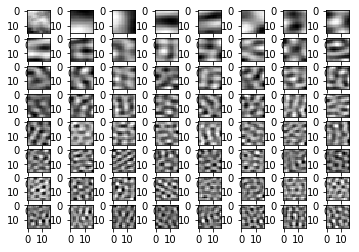

In [22]:
top_patches = list()

for i in range(0,64):
    final_patch = np.zeros((16,16))
    v_temp = eigenvector[:,i]
    
#     print(v_temp.shape, final_patch.shape)
    for r in range(0,16):
        for c in range(0,16):
            final_patch[r,c] = v_temp[c+(r*16)]
#     print(final_patch,"----",v_temp);        
    plt.subplot(8,8,1+i)
    plt.imshow(final_patch, cmap='gray') 
    